<a href="https://colab.research.google.com/github/tumblingdice512/Research/blob/master/model3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

モデル3 シンプルなnumpyによる実装(tanhの使用)



モデルについて

幅N、深さL+1(l=0,1,･･･,L)のネットワーク

各パーセプトロンはM成分を持つスピンで各成分は+1か-1を取る

第l層と第l+1層の各パーセプトロンの同一成分は全て結合→重みJ

各層の重みJはΣJ^2 = Nと正規化されている

第l層のスピンの値に重みをかけた値に対して符号関数をかませたものが第l+1層の値(0に対して+1か-1にする)

ただし学習の際には、tanhを使っている
第l+1層の学習用の出力 = tanh(第l層の出力)
第l+1層のスピンの値 = sign(第l層の出力)

初期条件としては、入力層と出力層のスピンの値を与える

入力層のスピンの値と、初期の重みの条件から、出力層を予想して、損失関数(平均2乗誤差)を小さくするために重みを更新する

In [171]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [220]:
N = 10
L = 5

In [221]:
#S0 = np.array([random.choice([1,-1]) for i in range(N)])
#SL = np.array([random.choice([1,-1]) for i in range(N)])

#print(S0)
#print("S0の要素数は",len(S0))

#print(SL)
#print("SLの要素数は",len(SL))

#初期条件として与えるスピンを生成
#各パーセプトロンのスピンの成分数を増やすときは、SOとSLを行列の形式にすればよい。

In [277]:
S0 = np.sign(np.random.randn(8,N))

SL = np.sign(np.random.randn(8,N))


M = len(S0)
print(M)
print(N)
print(S0.shape)
print(S0[0].shape)


8
10
(8, 10)
(10,)


In [278]:
alpha = M / N
print(alpha)

0.8


In [279]:
D = np.array([[1,2,3],[2,3,4]])
print(D.shape)
print(len(D)) #M
print(len(D[0])) #N

(2, 3)
2
3


In [280]:
def spin_overlap(x,y):
  spin_overlap = 0
  for i in range (len(x[0])) :

    spin_overlap = spin_overlap + np.dot(x.T[i],y.T[i])
  return np.abs(spin_overlap/(len(x)*len(x[0])))

print(spin_overlap(S0,S0))


1.0


In [281]:
def bond_overlap(x,y):
  bond_overlap = 0
  for i in range (len(x[0])) :

    bond_overlap = bond_overlap + np.dot(x.T[i],y.T[i])
  return np.abs(bond_overlap/(len(x[0])*len(x[0])))

In [282]:
S_a = np.array([[1,-1],[1,1],[1,-1]])
S_b = np.array([[1,-1],[1,1],[1,1]])
print(spin_overlap(S_a,S_b))
print(spin_overlap(S_a,S_a))

0.6666666666666666
1.0


In [283]:
a1 = np.dot(S_a.T[0],S_b.T[0])
a2 = np.dot(S_a.T[1],S_b.T[1])
a3 = (a1 + a2)/(2*3)
print(a3)

0.6666666666666666


In [284]:
def MSE(t, y):
    mse = np.mean(np.sum(np.square(t-y),axis =1),axis = 0)
    return mse



In [285]:
A = np.array([[3,5,1],[4,12,1]])
print(A**2)
A_norm = (np.sum(np.square(A),axis=0))**(1/2)

A_normalized = A / A_norm
A_normalized_2 = A / A_norm * (N**(1/2))

print(A_norm)

print(A_normalized)
print(A_normalized_2)


[[  9  25   1]
 [ 16 144   1]]
[ 5.         13.          1.41421356]
[[0.6        0.38461538 0.70710678]
 [0.8        0.92307692 0.70710678]]
[[1.8973666  1.21626064 2.23606798]
 [2.52982213 2.91902553 2.23606798]]


In [286]:
def weight_norm(x):
    x_norm = (np.sum(np.square(x),axis=0)**(1/2))
    return x_norm

In [287]:
w_a = np.array([[0,0,1],[1,0,0],[0,1,0]]) 
w_b = np.array([[1,0,0],[0,1,0],[0,0,1]]) 
J_a = w_a / (weight_norm(w_a)) * (3**(1/2))
J_b = w_b / (weight_norm(w_b)) * (3**(1/2))


print(J_a)
print(J_b)
print(len(J_a[0]))

print(bond_overlap(J_a,J_b))
print(bond_overlap(J_a,J_a))

[[0.         0.         1.73205081]
 [1.73205081 0.         0.        ]
 [0.         1.73205081 0.        ]]
[[1.73205081 0.         0.        ]
 [0.         1.73205081 0.        ]
 [0.         0.         1.73205081]]
3
0.0
0.9999999999999998


In [288]:
class Network1():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_1 = np.random.randn(N,N)
    self.w2_1 = np.random.randn(N,N)
    self.w3_1 = np.random.randn(N,N)
    self.w4_1 = np.random.randn(N,N)
    self.w5_1 = np.random.randn(N,N)

    #重みの正規化
    self.J1_1 = self.w1_1 / (weight_norm(self.w1_1)) * (N**(1/2))
    self.J2_1 = self.w2_1 / (weight_norm(self.w2_1)) * (N**(1/2))
    self.J3_1 = self.w3_1 / (weight_norm(self.w3_1)) * (N**(1/2))
    self.J4_1 = self.w4_1 / (weight_norm(self.w4_1)) * (N**(1/2))
    self.J5_1 = self.w5_1 / (weight_norm(self.w5_1)) * (N**(1/2))

  def forward(self, x):

    self.layer0_1 = x
    self.layer1_1 = np.tanh(np.dot(self.layer0_1, self.J1_1))
    self.layer2_1 = np.tanh(np.dot(self.layer1_1, self.J2_1))
    self.layer3_1 = np.tanh(np.dot(self.layer2_1, self.J3_1))
    self.layer4_1 = np.tanh(np.dot(self.layer3_1, self.J4_1))
    self.out_1 = np.sign((np.dot(self.layer4_1, self.J5_1)) + 10e-7)

    S1_1 = np.sign(self.layer1_1)
    S2_1 = np.sign(self.layer2_1)
    S3_1 = np.sign(self.layer3_1)
    S4_1 = np.sign(self.layer4_1)

    return self.out_1, S1_1, S2_1, S3_1, S4_1
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_1 = -2*(t-y)
    delta4_1 = np.dot(delta5_1,self.J5_1.T)
    delta3_1 = np.dot(delta4_1 * (1 - np.tanh(delta4_1)**2),self.J4_1.T) 
    delta2_1 = np.dot(delta3_1 * (1 - np.tanh(delta3_1)**2),self.J3_1.T)
    delta1_1 = np.dot(delta2_1 * (1 - np.tanh(delta2_1)**2),self.J2_1.T)

    #重みの勾配
    self.dedJ5_1 = np.dot(self.layer4_1.T, delta5_1) / delta5_1.shape[0]
    self.dedJ4_1 = np.dot(self.layer3_1.T, delta4_1 * (1 - np.tanh(delta4_1)**2)) / delta4_1.shape[0]
    self.dedJ3_1 = np.dot(self.layer2_1.T, delta3_1 * (1 - np.tanh(delta3_1)**2)) / delta3_1.shape[0]
    self.dedJ2_1 = np.dot(self.layer1_1.T, delta2_1 * (1 - np.tanh(delta2_1)**2)) / delta2_1.shape[0]
    self.dedJ1_1 = np.dot(self.layer0_1.T, delta1_1 * (1 - np.tanh(delta1_1)**2)) / delta1_1.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_1 -= lr * self.dedJ1_1
    self.J2_1 -= lr * self.dedJ2_1
    self.J3_1 -= lr * self.dedJ3_1
    self.J4_1 -= lr * self.dedJ4_1
    self.J5_1 -= lr * self.dedJ5_1

    #重みの正規化
    self.J1_1 = self.J1_1 / (weight_norm(self.J1_1)) * (N**(1/2))
    self.J2_1 = self.J2_1 / (weight_norm(self.J2_1)) * (N**(1/2))
    self.J3_1 = self.J3_1 / (weight_norm(self.J3_1)) * (N**(1/2))
    self.J4_1 = self.J4_1 / (weight_norm(self.J4_1)) * (N**(1/2))
    self.J5_1 = self.J5_1 / (weight_norm(self.J5_1)) * (N**(1/2))

    return self.J1_1, self.J2_1, self.J3_1, self.J4_1, self.J5_1



In [289]:
class Network2():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_2 = np.random.randn(N,N)
    self.w2_2 = np.random.randn(N,N)
    self.w3_2 = np.random.randn(N,N)
    self.w4_2 = np.random.randn(N,N)
    self.w5_2 = np.random.randn(N,N)

    #重みの正規化
    self.J1_2 = self.w1_2 / (weight_norm(self.w1_2)) * (N**(1/2))
    self.J2_2 = self.w2_2 / (weight_norm(self.w2_2)) * (N**(1/2))
    self.J3_2 = self.w3_2 / (weight_norm(self.w3_2)) * (N**(1/2))
    self.J4_2 = self.w4_2 / (weight_norm(self.w4_2)) * (N**(1/2))
    self.J5_2 = self.w5_2 / (weight_norm(self.w5_2)) * (N**(1/2))

  def forward(self, x):

    self.layer0_2 = x
    self.layer1_2 = np.tanh(np.dot(self.layer0_2, self.J1_2))
    self.layer2_2 = np.tanh(np.dot(self.layer1_2, self.J2_2))
    self.layer3_2 = np.tanh(np.dot(self.layer2_2, self.J3_2))
    self.layer4_2 = np.tanh(np.dot(self.layer3_2, self.J4_2))
    self.out_2 = np.sign((np.dot(self.layer4_2, self.J5_2)) + 10e-7)

    S1_2 = np.sign(self.layer1_2)
    S2_2 = np.sign(self.layer2_2)
    S3_2 = np.sign(self.layer3_2)
    S4_2 = np.sign(self.layer4_2)

    return self.out_2, S1_2, S2_2, S3_2, S4_2
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_2 = -2*(t-y)
    delta4_2 = np.dot(delta5_2,self.J5_2.T)
    delta3_2 = np.dot(delta4_2 * (1 - np.tanh(delta4_2)**2),self.J4_2.T) 
    delta2_2 = np.dot(delta3_2 * (1 - np.tanh(delta3_2)**2),self.J3_2.T)
    delta1_2 = np.dot(delta2_2 * (1 - np.tanh(delta2_2)**2),self.J2_2.T)

    #重みの勾配
    self.dedJ5_2 = np.dot(self.layer4_2.T, delta5_2) / delta5_2.shape[0]
    self.dedJ4_2 = np.dot(self.layer3_2.T, delta4_2 * (1 - np.tanh(delta4_2)**2)) / delta4_2.shape[0]
    self.dedJ3_2 = np.dot(self.layer2_2.T, delta3_2 * (1 - np.tanh(delta3_2)**2)) / delta3_2.shape[0]
    self.dedJ2_2 = np.dot(self.layer1_2.T, delta2_2 * (1 - np.tanh(delta2_2)**2)) / delta2_2.shape[0]
    self.dedJ1_2 = np.dot(self.layer0_2.T, delta1_2 * (1 - np.tanh(delta1_2)**2)) / delta1_2.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_2 -= lr * self.dedJ1_2
    self.J2_2 -= lr * self.dedJ2_2
    self.J3_2 -= lr * self.dedJ3_2
    self.J4_2 -= lr * self.dedJ4_2
    self.J5_2 -= lr * self.dedJ5_2

    #重みの正規化
    self.J1_2 = self.J1_2 / (weight_norm(self.J1_2)) * (N**(1/2))
    self.J2_2 = self.J2_2 / (weight_norm(self.J2_2)) * (N**(1/2))
    self.J3_2 = self.J3_2 / (weight_norm(self.J3_2)) * (N**(1/2))
    self.J4_2 = self.J4_2 / (weight_norm(self.J4_2)) * (N**(1/2))
    self.J5_2 = self.J5_2 / (weight_norm(self.J5_2)) * (N**(1/2))

    return self.J1_2, self.J2_2, self.J3_2, self.J4_2, self.J5_2

    

In [290]:
class Network3():
  #ネットワークを定義する
  #構成[入力層, 第1層, 第2層, 第3層, 第4層, 第5層]
  #全結合

  def __init__(self):
    #重みの定義
    self.w1_3 = np.random.randn(N,N)
    self.w2_3 = np.random.randn(N,N)
    self.w3_3 = np.random.randn(N,N)
    self.w4_3 = np.random.randn(N,N)
    self.w5_3 = np.random.randn(N,N)

    #重みの正規化
    self.J1_3 = self.w1_3 / (weight_norm(self.w1_3)) * (N**(1/2))
    self.J2_3 = self.w2_3 / (weight_norm(self.w2_3)) * (N**(1/2))
    self.J3_3 = self.w3_3 / (weight_norm(self.w3_3)) * (N**(1/2))
    self.J4_3 = self.w4_3 / (weight_norm(self.w4_3)) * (N**(1/2))
    self.J5_3 = self.w5_3 / (weight_norm(self.w5_3)) * (N**(1/2))

  def forward(self, x):

    self.layer0_3 = x
    self.layer1_3 = np.tanh(np.dot(self.layer0_3, self.J1_3))
    self.layer2_3 = np.tanh(np.dot(self.layer1_3, self.J2_3))
    self.layer3_3 = np.tanh(np.dot(self.layer2_3, self.J3_3))
    self.layer4_3 = np.tanh(np.dot(self.layer3_3, self.J4_3))
    self.out_3 = np.sign((np.dot(self.layer4_3, self.J5_3)) + 10e-7)

    S1_3 = np.sign(self.layer1_3)
    S2_3 = np.sign(self.layer2_3)
    S3_3 = np.sign(self.layer3_3)
    S4_3 = np.sign(self.layer4_3)

    return self.out_3, S1_3, S2_3, S3_3, S4_3
    

  def backward(self, t, y):
    #誤差逆伝播
    delta5_3 = -2*(t-y)
    delta4_3 = np.dot(delta5_3,self.J5_3.T)
    delta3_3 = np.dot(delta4_3 * (1 - np.tanh(delta4_3)**2),self.J4_3.T) 
    delta2_3 = np.dot(delta3_3 * (1 - np.tanh(delta3_3)**2),self.J3_3.T)
    delta1_3 = np.dot(delta2_3 * (1 - np.tanh(delta2_3)**2),self.J2_3.T)

    #重みの勾配
    self.dedJ5_3 = np.dot(self.layer4_3.T, delta5_3) / delta5_3.shape[0]
    self.dedJ4_3 = np.dot(self.layer3_3.T, delta4_3 * (1 - np.tanh(delta4_3)**2)) / delta4_3.shape[0]
    self.dedJ3_3 = np.dot(self.layer2_3.T, delta3_3 * (1 - np.tanh(delta3_3)**2)) / delta3_3.shape[0]
    self.dedJ2_3 = np.dot(self.layer1_3.T, delta2_3 * (1 - np.tanh(delta2_3)**2)) / delta2_3.shape[0]
    self.dedJ1_3 = np.dot(self.layer0_3.T, delta1_3 * (1 - np.tanh(delta1_3)**2)) / delta1_3.shape[0]

  def optimize_GradientDecent(self, lr):
    #重みの更新    
    self.J1_3 -= lr * self.dedJ1_3
    self.J2_3 -= lr * self.dedJ2_3
    self.J3_3 -= lr * self.dedJ3_3
    self.J4_3 -= lr * self.dedJ4_3
    self.J5_3 -= lr * self.dedJ5_3

    #重みの正規化
    self.J1_3 = self.J1_3 / (weight_norm(self.J1_3)) * (N**(1/2))
    self.J2_3 = self.J2_3 / (weight_norm(self.J2_3)) * (N**(1/2))
    self.J3_3 = self.J3_3 / (weight_norm(self.J3_3)) * (N**(1/2))
    self.J4_3 = self.J4_3 / (weight_norm(self.J4_3)) * (N**(1/2))
    self.J5_3 = self.J5_3 / (weight_norm(self.J5_3)) * (N**(1/2))

    return self.J1_3, self.J2_3, self.J3_3, self.J4_3, self.J5_3

In [291]:
model_1 = Network1()
model_2 = Network2()
model_3 = Network3()


# 学習率
lr = 0.07
# 学習エポック数
n_epoch = 5000
Loss_1 = []
Loss_2 = []
Loss_3 = []

#レプリカ1と2
q_12_S0 = []
q_12_S1 = []
q_12_S2 = []
q_12_S3 = []
q_12_S4 = []
q_12_SL = []

Q_12_1 = []
Q_12_2 = []
Q_12_3 = []
Q_12_4 = []
Q_12_5 = []

#レプリカ1と3
q_13_S0 = []
q_13_S1 = []
q_13_S2 = []
q_13_S3 = []
q_13_S4 = []
q_13_SL = []

Q_13_1 = []
Q_13_2 = []
Q_13_3 = []
Q_13_4 = []
Q_13_5 = []

#レプリカ2と3
q_23_S0 = []
q_23_S1 = []
q_23_S2 = []
q_23_S3 = []
q_23_S4 = []
q_23_SL = []

Q_23_1 = []
Q_23_2 = []
Q_23_3 = []
Q_23_4 = []
Q_23_5 = []


  # n_epoch繰り返す
  
for n in range(n_epoch):
    y_1 = model_1.forward(S0)
    y_2 = model_2.forward(S0)
    y_3 = model_3.forward(S0)

    loss_Network_1 = MSE(SL, y_1[0])
    loss_Network_2 = MSE(SL, y_2[0])
    loss_Network_3 = MSE(SL, y_3[0])

    model_1.backward(SL, y_1[0])
    model_2.backward(SL, y_2[0])
    model_3.backward(SL, y_3[0])

    w_1 = model_1.optimize_GradientDecent(lr)
    w_2 = model_2.optimize_GradientDecent(lr)
    w_3 = model_3.optimize_GradientDecent(lr)


    #レプリカ1と2のオーダーパラメータ

    spin_overlap_12_S0 = spin_overlap(S0,S0)
    q_12_S0.append(spin_overlap_12_S0)

    bond_overlap_12_1 = bond_overlap(w_1[0],w_2[0])
    Q_12_1.append(bond_overlap_12_1)

    spin_overlap_12_S1 = spin_overlap(y_1[1],y_2[1])
    q_12_S1.append(spin_overlap_12_S1)

    bond_overlap_12_2 = bond_overlap(w_1[1],w_2[1])
    Q_12_2.append(bond_overlap_12_2)

    spin_overlap_12_S2 = spin_overlap(y_1[2],y_2[2])
    q_12_S2.append(spin_overlap_12_S2)

    bond_overlap_12_3 = bond_overlap(w_1[2],w_2[2])
    Q_12_3.append(bond_overlap_12_3)

    spin_overlap_12_S3 = spin_overlap(y_1[3],y_2[3])
    q_12_S3.append(spin_overlap_12_S3)

    bond_overlap_12_4 = bond_overlap(w_1[3],w_2[3])
    Q_12_4.append(bond_overlap_12_4)

    spin_overlap_12_S4 = spin_overlap(y_1[4],y_2[4])
    q_12_S4.append(spin_overlap_12_S4)

    bond_overlap_12_5 = bond_overlap(w_1[4],w_2[4])
    Q_12_5.append(bond_overlap_12_5)

    spin_overlap_12_SL = spin_overlap(SL,SL)
    q_12_SL.append(spin_overlap_12_SL)


    #レプリカ1と3のオーダーパラメータ

    spin_overlap_13_S0 = spin_overlap(S0,S0)
    q_13_S0.append(spin_overlap_13_S0)

    bond_overlap_13_1 = bond_overlap(w_1[0],w_3[0])
    Q_13_1.append(bond_overlap_13_1)

    spin_overlap_13_S1 = spin_overlap(y_1[1],y_3[1])
    q_13_S1.append(spin_overlap_13_S1)

    bond_overlap_13_2 = bond_overlap(w_1[1],w_3[1])
    Q_13_2.append(bond_overlap_13_2)

    spin_overlap_13_S2 = spin_overlap(y_1[2],y_3[2])
    q_13_S2.append(spin_overlap_13_S2)

    bond_overlap_13_3 = bond_overlap(w_1[2],w_3[2])
    Q_13_3.append(bond_overlap_13_3)

    spin_overlap_13_S3 = spin_overlap(y_1[3],y_3[3])
    q_13_S3.append(spin_overlap_13_S3)

    bond_overlap_13_4 = bond_overlap(w_1[3],w_3[3])
    Q_13_4.append(bond_overlap_13_4)

    spin_overlap_13_S4 = spin_overlap(y_1[4],y_3[4])
    q_13_S4.append(spin_overlap_13_S4)

    bond_overlap_13_5 = bond_overlap(w_1[4],w_3[4])
    Q_13_5.append(bond_overlap_13_5)

    spin_overlap_13_SL = spin_overlap(SL,SL)
    q_13_SL.append(spin_overlap_13_SL)


    #レプリカ2と3のオーダーパラメータ

    spin_overlap_23_S0 = spin_overlap(S0,S0)
    q_23_S0.append(spin_overlap_23_S0)

    bond_overlap_23_1 = bond_overlap(w_3[0],w_2[0])
    Q_23_1.append(bond_overlap_23_1)

    spin_overlap_23_S1 = spin_overlap(y_3[1],y_2[1])
    q_23_S1.append(spin_overlap_23_S1)

    bond_overlap_23_2 = bond_overlap(w_3[1],w_2[1])
    Q_23_2.append(bond_overlap_23_2)

    spin_overlap_23_S2 = spin_overlap(y_3[2],y_2[2])
    q_23_S2.append(spin_overlap_23_S2)

    bond_overlap_23_3 = bond_overlap(w_3[2],w_2[2])
    Q_23_3.append(bond_overlap_23_3)

    spin_overlap_23_S3 = spin_overlap(y_3[3],y_2[3])
    q_23_S3.append(spin_overlap_23_S3)

    bond_overlap_23_4 = bond_overlap(w_3[3],w_2[3])
    Q_23_4.append(bond_overlap_23_4)

    spin_overlap_23_S4 = spin_overlap(y_3[4],y_2[4])
    q_23_S4.append(spin_overlap_23_S4)

    bond_overlap_23_5 = bond_overlap(w_3[4],w_2[4])
    Q_23_5.append(bond_overlap_23_5)

    spin_overlap_23_SL = spin_overlap(SL,SL)
    q_23_SL.append(spin_overlap_23_SL)




    Loss_1.append(loss_Network_1)
    Loss_2.append(loss_Network_2)
    Loss_3.append(loss_Network_3)

    print('EPOCH ', n + 1, ' | TRAIN LOSS_1 ',loss_Network_1, '  TRAIN LOSS_2 ',loss_Network_2,'  TRAIN LOSS_3 ',loss_Network_3)

    



ストリーミング出力は最後の 5000 行に切り捨てられました。
EPOCH  1  | TRAIN LOSS_1  20.5   TRAIN LOSS_2  21.5   TRAIN LOSS_3  14.5
EPOCH  2  | TRAIN LOSS_1  20.0   TRAIN LOSS_2  19.5   TRAIN LOSS_3  15.5
EPOCH  3  | TRAIN LOSS_1  17.5   TRAIN LOSS_2  20.0   TRAIN LOSS_3  15.0
EPOCH  4  | TRAIN LOSS_1  15.0   TRAIN LOSS_2  16.0   TRAIN LOSS_3  12.5
EPOCH  5  | TRAIN LOSS_1  16.0   TRAIN LOSS_2  18.5   TRAIN LOSS_3  13.5
EPOCH  6  | TRAIN LOSS_1  13.5   TRAIN LOSS_2  16.0   TRAIN LOSS_3  12.5
EPOCH  7  | TRAIN LOSS_1  14.0   TRAIN LOSS_2  14.5   TRAIN LOSS_3  12.5
EPOCH  8  | TRAIN LOSS_1  12.5   TRAIN LOSS_2  13.5   TRAIN LOSS_3  12.0
EPOCH  9  | TRAIN LOSS_1  13.0   TRAIN LOSS_2  14.0   TRAIN LOSS_3  10.0
EPOCH  10  | TRAIN LOSS_1  12.0   TRAIN LOSS_2  15.0   TRAIN LOSS_3  10.5
EPOCH  11  | TRAIN LOSS_1  8.5   TRAIN LOSS_2  13.5   TRAIN LOSS_3  10.0
EPOCH  12  | TRAIN LOSS_1  11.0   TRAIN LOSS_2  12.0   TRAIN LOSS_3  10.0
EPOCH  13  | TRAIN LOSS_1  10.0   TRAIN LOSS_2  12.5   TRAIN LOSS_3  11.5
EPOCH  14  | TRA

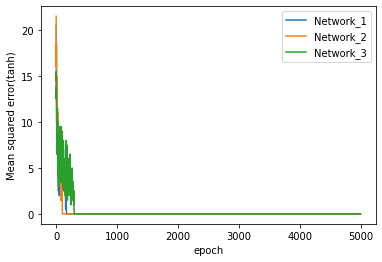

In [294]:
i = range(n_epoch)
plt.plot(i, Loss_1)
plt.plot(i, Loss_2)
plt.plot(i, Loss_3)
plt.legend(['Network_1', 'Network_2', 'Network_3'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error(tanh)')
plt.show()

In [295]:
q_12 = np.array([q_12_S0[n_epoch-1], q_12_S1[n_epoch-1], q_12_S2[n_epoch-1],
     q_12_S3[n_epoch-1], q_12_S4[n_epoch-1], q_12_SL[n_epoch-1]])

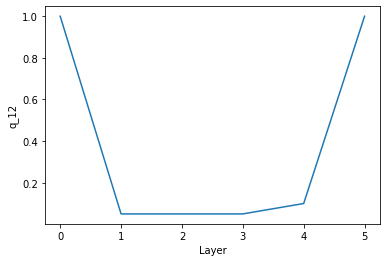

In [296]:
i = [0,1,2,3,4,5]
plt.plot(i, q_12)
plt.xlabel('Layer')
plt.ylabel('q_12')
plt.show()

In [297]:
q_13 = np.array([q_13_S0[n_epoch-1], q_13_S1[n_epoch-1], q_13_S2[n_epoch-1],
     q_13_S3[n_epoch-1], q_13_S4[n_epoch-1], q_13_SL[n_epoch-1]])

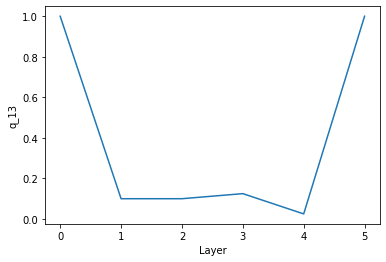

In [298]:
i = [0,1,2,3,4,5]
plt.plot(i, q_13)
plt.xlabel('Layer')
plt.ylabel('q_13')
plt.show()

In [299]:
q_23 = np.array([q_23_S0[n_epoch-1], q_23_S1[n_epoch-1], q_23_S2[n_epoch-1],
     q_23_S3[n_epoch-1], q_23_S4[n_epoch-1], q_23_SL[n_epoch-1]])

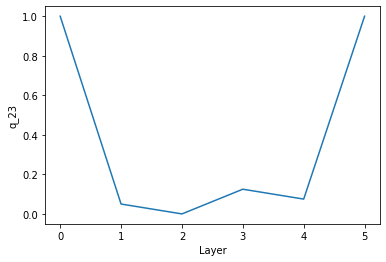

In [300]:
i = [0,1,2,3,4,5]
plt.plot(i, q_23)
plt.xlabel('Layer')
plt.ylabel('q_23')
plt.show()

In [301]:
Q_12 = np.array([Q_12_1[n_epoch-1], Q_12_2[n_epoch-1], Q_12_3[n_epoch-1],
     Q_12_4[n_epoch-1], Q_12_5[n_epoch-1]])

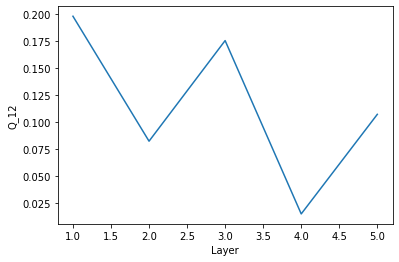

In [302]:
i = [1,2,3,4,5]
plt.plot(i, Q_12)
plt.xlabel('Layer')
plt.ylabel('Q_12')
plt.show()

In [303]:
Q_13 = np.array([Q_13_1[n_epoch-1], Q_13_2[n_epoch-1], Q_13_3[n_epoch-1],
     Q_13_4[n_epoch-1], Q_13_5[n_epoch-1]])


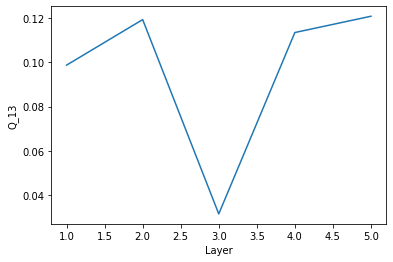

In [304]:
i = [1,2,3,4,5]
plt.plot(i, Q_13)
plt.xlabel('Layer')
plt.ylabel('Q_13')
plt.show()

In [305]:
Q_23 = np.array([Q_23_1[n_epoch-1], Q_23_2[n_epoch-1], Q_23_3[n_epoch-1],
     Q_23_4[n_epoch-1], Q_23_5[n_epoch-1]])

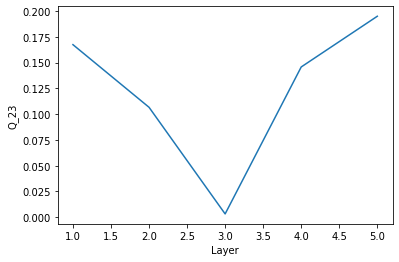

In [306]:
i = [1,2,3,4,5]
plt.plot(i, Q_23)
plt.xlabel('Layer')
plt.ylabel('Q_23')
plt.show()


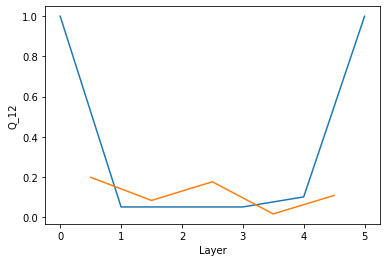

In [307]:
i = [0,1,2,3,4,5]
plt.plot(i, q_12)
plt.xlabel('Layer')
plt.ylabel('q_12')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_12)
plt.xlabel('Layer')
plt.ylabel('Q_12')
plt.show()

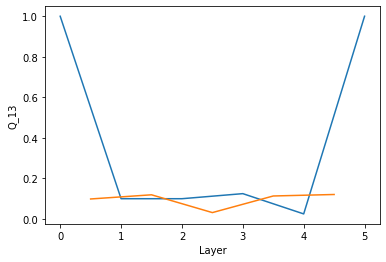

In [308]:
i = [0,1,2,3,4,5]
plt.plot(i, q_13)
plt.xlabel('Layer')
plt.ylabel('q_13')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_13)
plt.xlabel('Layer')
plt.ylabel('Q_13')
plt.show()

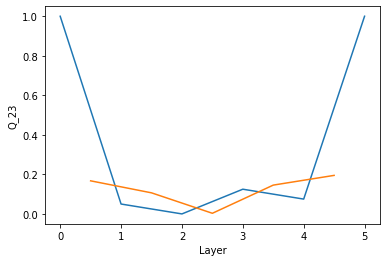

In [309]:
i = [0,1,2,3,4,5]
plt.plot(i, q_23)
plt.xlabel('Layer')
plt.ylabel('q_23')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q_23)
plt.xlabel('Layer')
plt.ylabel('Q_23')
plt.show()

[0.15463408 0.10278521 0.07002213 0.09148895 0.14098772]


In [311]:
q = (q_12 + q_13 + q_23) / 3
Q = (Q_12 + Q_13 + Q_23) / 3
print(q)
print(Q)

[1.         0.06666667 0.05       0.1        0.06666667 1.        ]
[0.15463408 0.10278521 0.07002213 0.09148895 0.14098772]


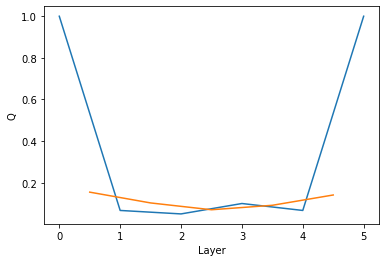

In [312]:
i = [0,1,2,3,4,5]
plt.plot(i, q)
plt.xlabel('Layer')
plt.ylabel('q')

i = [0.5,1.5,2.5,3.5,4.5]
plt.plot(i, Q)
plt.xlabel('Layer')
plt.ylabel('Q')
plt.show()